In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from plot_helpers import plot_clusters
from dataset_helpers import preprocess, get_label, unishuffle

imw = 192
imh = 192
c = 3
RS = 2211

In [2]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Combined dataset

In [3]:
npzfile = np.load('/Users/Leonore/Desktop/dmso_unmodified.npz')
x = npzfile['x']
y = npzfile['y']

In [5]:
y = [get_label(i) for i in y]

In [6]:
x_combined, y_combined = preprocess(x, y)

Images preprocessed. Size of dataset: 9800


In [7]:
x_combined, y_combined = unishuffle(x_combined, y_combined)

In [10]:
x_tsne = TSNE().fit_transform(x_combined[:500].reshape(500, 192*192*3))

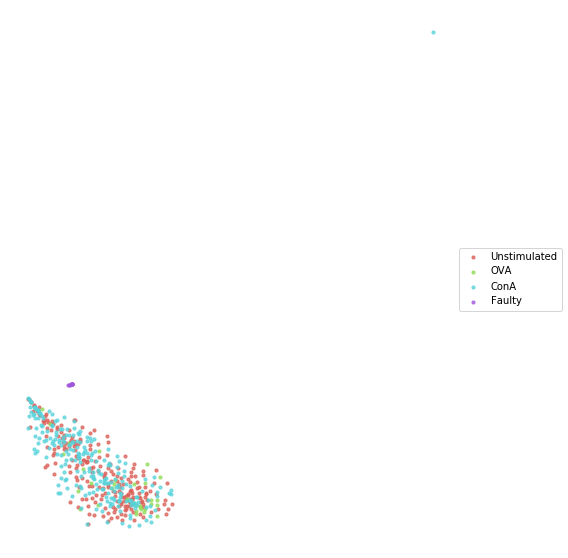

In [12]:
plot_clusters(x_tsne, y_combined[:500])

In [11]:
x_umap = umap.UMAP().fit_transform(x_combined[:500].reshape(500, 192*192*3))

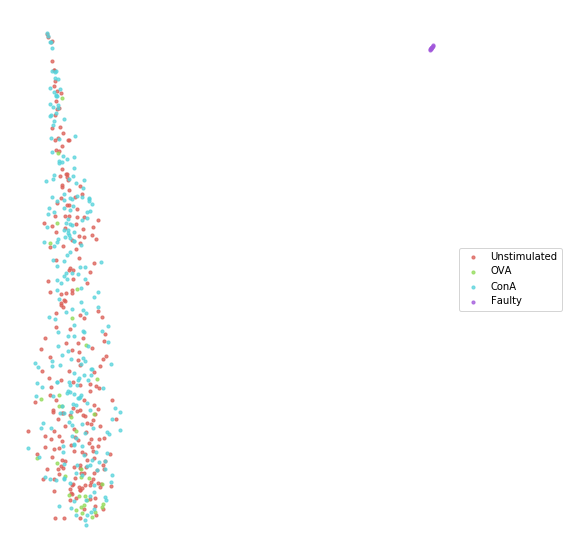

In [13]:
plot_clusters(x_umap, y_combined[:500])

# New dataset

* DMSO preprocessed, no shadow cells (255 clipped)

!! Do this with reduced datasets, as they are still very high dimensions.

In [4]:
npzfile = np.load('/Users/Leonore/Desktop/dmso_unmodified.npz')
x = npzfile['x']
y = npzfile['y']

In [5]:
import copy

In [7]:
x_dmso_255 = copy.deepcopy(x)
for idx, i in enumerate(x_dmso_255):
    x_dmso_255[idx] = max_normalise(low_clip(i))

In [8]:
x = np.reshape(x_dmso_255[:21000:100], (210, 192*192))

In [11]:
y_dmso = [get_label(file) for file in y]
y_dmso = y_dmso[:21000:100]

In [15]:
X = TSNE(random_state=RS).fit_transform(x)

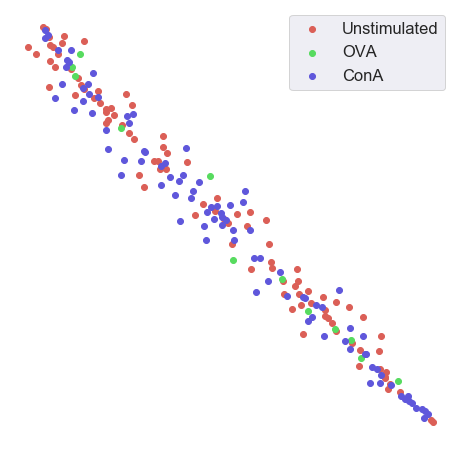

In [26]:
plot_tsne(X[:196], y_dmso)

# Old dataset

In [5]:
dataset, filenames = images_to_dataset(w=imw, h=imh)

All files formatted into dataset.


In [6]:
labels, DMSO = filenames_to_labels(filenames)

In [7]:
x = np.reshape(dataset, (len(dataset), imw*imh))

In [12]:
DMSO_dataset = np.ndarray(shape=(len(DMSO), imw, imh), dtype=np.float32)
DMSO_labels = []
i = 0
for index in DMSO:
    DMSO_dataset[i] = dataset[index]
    DMSO_labels.append(labels[index])
    i += 1

In [ ]:
x_dmso = np.reshape(DMSO_dataset, ((len(DMSO), imw*imh)))

## T-SNE baseline performance (full + DMSO)

In [20]:
# https://www.datacamp.com/community/tutorials/introduction-t-sne
tsne = TSNE(learning_rate=500, random_state=RS)

In [21]:
x_tsne = tsne.fit_transform(x)

(<Figure size 576x576 with 1 Axes>,
 [Text(0.21711496, -0.34752136, '0'),
  Text(0.62838405, 0.6791214, '1'),
  Text(1.2031617, -0.060758263, '2'),
  Text(1.6867067, 1.2284657, '3')])

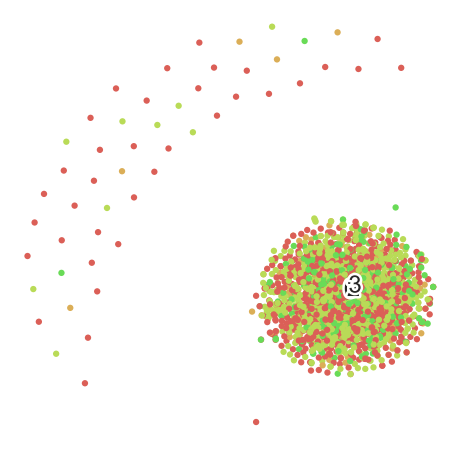

In [10]:
## DONT RUN --- this is with basic learning rate

scatter(x_tsne, labels)

(<Figure size 576x576 with 1 Axes>,
 [Text(0.43629143, 0.02613152, '0'),
  Text(0.044294633, -0.90495664, '1'),
  Text(0.6530419, -1.3527824, '2'),
  Text(1.6549261, 0.68350756, '3')])

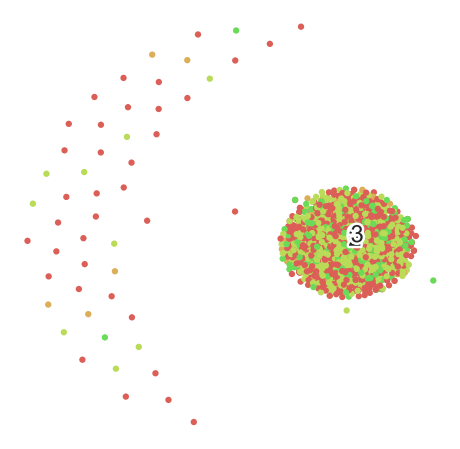

In [22]:
scatter(x_tsne, labels)

In [23]:
tsne_dmso = tsne.fit_transform(x_dmso)

/Users/Leonore/Documents/Workspace/venv/ml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Leonore/Documents/Workspace/venv/ml/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(4.5313663, -3.0184612, '0'),
  Text(-4.4305277, 22.94482, '1'),
  Text(-9.4074745, -14.612383, '2'),
  Text(nan, nan, '3')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


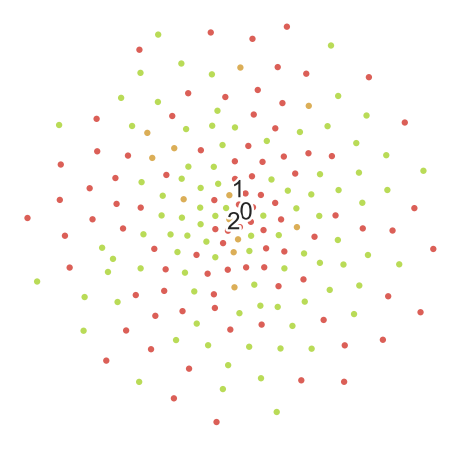

In [14]:
## DONT RUN --- this is with basic learning rate

scatter(tsne_dmso, DMSO_labels)

In [ ]:
scatter(tsne_dmso, DMSO_labels)

## UMAP performance (full + DMSO)

In [15]:
import umap.umap_ as umap
reducer = umap.UMAP(num_neighbours=50)

In [16]:
x_umap = reducer.fit_transform(x)

(<Figure size 576x576 with 1 Axes>,
 [Text(-1.2202404, 2.3198228, '0'),
  Text(-1.1029155, 2.0322633, '1'),
  Text(-1.532073, 2.2072115, '2'),
  Text(-1.2616298, 2.1214569, '3')])

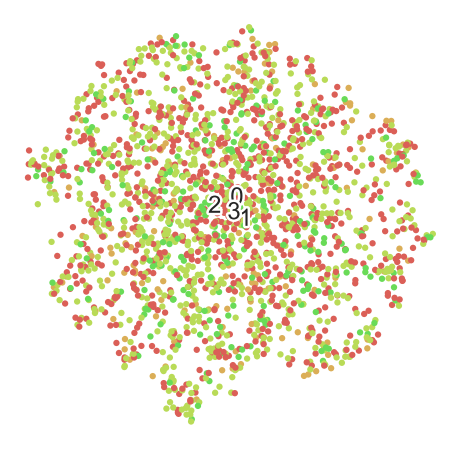

In [17]:
## DONT RUN --- this is with basic parameters

scatter(x_umap, labels)

In [18]:
dmso_umap = reducer.fit_transform(x_dmso)

/Users/Leonore/Documents/Workspace/venv/ml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Leonore/Documents/Workspace/venv/ml/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 [Text(-2.580466, -8.663319, '0'),
  Text(-1.9990069, -8.432556, '1'),
  Text(-2.7368622, -8.6636095, '2'),
  Text(nan, nan, '3')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


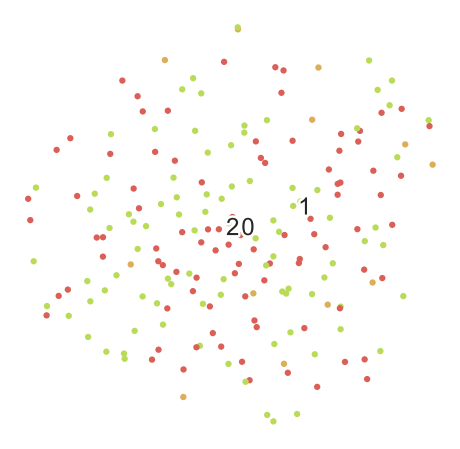

In [19]:
## DONT RUN --- this is with basic learning rate

scatter(dmso_umap, DMSO_labels)